# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
%pylab inline
import matplotlib.pyplot as plt
import seaborn 

Populating the interactive namespace from numpy and matplotlib


In [2]:
# orange_labels - DataFrame, содержащий метки классов
orange_labels = pd.read_csv('orange_small_churn_labels.train', sep = '/r', header = None)
orange_labels.columns = ['churn']
orange_labels.head()

C:\Users\802204\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,churn
0,-1
1,-1
2,-1
3,1
4,-1


In [3]:
# orange_data - DataFrame, содержащий данные
orange_data = pd.read_csv('orange_small_churn_data.train', sep = ',', header = 0)
orange_data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


In [4]:
# Создадим списки: 
# col_num - список названий столбцов с числовыми переменными,
# col_cat - список названий столбцов с категориальными переменными
col_num=[]
col_cat=[]
for i in range(190):
    col_num.append(orange_data.columns[i])
for i in range(190,orange_data.shape[1]):
    col_cat.append(orange_data.columns[i])

2\. Рассчитайте доли классов `отток` и `не отток`.

In [5]:
# churn - массив numpy из 2-х элеменов - доли классов "не отток" и "отток"
num1,num2= orange_labels.churn.value_counts()
churn=np.array((float(num1)/len(orange_labels),float(num2)/len(orange_labels)))
print 'Доля класса "Не отток:"', churn[0], 'Доля класса "Отток:"', churn[1]

Доля класса "Не отток:" 0.9256 Доля класса "Отток:" 0.0744




3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [6]:
# Перед расчетом корреляций удалим столбцы, у которых все значения пустые
# orange_data_ch - преобразованнй DataFrame, содержащий данные
orange_data_ch=orange_data.dropna(axis=1, how='all')
orange_data_ch.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,hLKtJ9p,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,hN8KpA1,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,4UxGlow,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,ylCK5YS,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,PYpzAu9,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN


Для тех пар признаков, среди которых один - бинарная переменная, а другой - числовая, в соответствии с рекомендациями курса №4 вместо корреляций в качестве меры силы взаимосвязи будут использоваться разности оценок математических ожиданий цифрового признака (средних значений по выбороке) при разных условиях бинарного.

Для тех пар признаков, среди которых один - бинарная переменная, а другой - категориальная будет использоваться коэффициент V Кремера. 

In [7]:
# функция для определения меры силы взаимосвязи (между бинарной и числовой переменной)
def korr_num(bd):
    e_churn=np.mean(bd[bd.churn==1].work)-np.mean(bd[bd.churn==-1].work)
    return e_churn

In [8]:
#korr_num_df - DataFrame, содержащий абсолютные значения меры силы взаимосвязи 
# для каждой числовой переменной с целевой переменной, а также количетво непустых значений переменной 
i=0
list_res=[]
bd=pd.DataFrame()
bd['churn']=orange_labels.churn
while orange_data_ch.columns[i] in col_num:
    var=orange_data_ch.columns[i]
    bd['work']=orange_data_ch[var]
    res=korr_num(bd)
    len_=len(bd.dropna())
    list_res.append([var,np.abs(res),len_])
    i=i+1
    bd.drop('work', axis=1, inplace=True)
korr_num_df=pd.DataFrame.from_records(list_res)
korr_num_df.columns=['Var','korr_num','len']
korr_num_df.head(5)

,Var,korr_num,len
0,Var1,1.670494,570
1,Var2,0.005181,1006
2,Var3,167.782993,1005
3,Var4,0.016095,1275
4,Var5,66949.866756,1165


In [9]:
korr_num_df.describe()

,korr_num,len
count,1.740000e+02,174.000000
mean,8.247251e+04,9066.201149
std,7.857569e+05,14687.415866
min,0.000000e+00,140.000000
25%,4.807304e-01,660.000000
50%,5.486567e+00,1006.000000
75%,8.040664e+03,1275.000000
max,1.034608e+07,40000.000000


In [10]:
# функция для определения коэффициента V Кремера - меры силы взаимосвязи 
# (между бинарной и категориальной переменной)
# и дополнителного параметра - количестсво значений признака
def korr_cat(bd_conting):
    koeff=scipy.stats.chi2_contingency(bd_conting)[0]
    n=bd_conting.sum().sum()
    k=min(bd_conting.shape[0],bd_conting.shape[1])
    res=np.sqrt(koeff/(n*(k-1)))
    val_numb=bd_conting.shape[0] 
    return res, val_numb 

In [11]:
# korr_cat_df - DataFrame, содержащий абсолютные значения коэффициента V Кремера 
# для каждой категориальной переменной с целевой переменной, 
# а также количетво значений, которые принимает каждая категориальная переменная 
list_res=[]
bd_cat=pd.DataFrame()
bd_cat['churn']=orange_labels.churn
for i in range(len(korr_num_df),orange_data_ch.shape[1]):
    var=orange_data_ch.columns[i]
    bd_cat['work']=orange_data_ch[var]
    bd_cat=bd_cat.fillna('NaN-empty')
    bd_conting=bd_cat.pivot_table(index='work', columns='churn', aggfunc=len)
    bd_conting.columns=['churn_no','churn_yes']
    bd_conting=bd_conting.fillna(0.0)
    res, val_numb =korr_cat(bd_conting)
    list_res.append([var,np.abs(res),val_numb])
    bd_cat.drop('work', axis=1, inplace=True)

korr_cat_df=pd.DataFrame.from_records(list_res)
korr_cat_df.columns=['Var','korr_num','val_numb']
korr_cat_df.head(5)

,Var,korr_num,val_numb
0,Var191,0.013905,2
1,Var192,0.151247,355
2,Var193,0.070207,50
3,Var194,0.019348,4
4,Var195,0.031671,23


In [12]:
korr_cat_df.describe()

,korr_num,val_numb
count,38.000000,38.000000
mean,0.127742,1671.394737
std,0.157891,3683.649619
min,0.005165,2.000000
25%,0.020954,4.000000
50%,0.060380,18.000000
75%,0.138875,321.500000
max,0.529863,13298.000000


In [13]:
# Полный список категориальных переменных (у которых есть хотя бы одно непустое значение), 
# с уазаниеи абсолютого значения коэффициента V Кремера 
# для каждой категориальной переменной с целевой переменной, 
# а также количетва значений, которые принимает каждая категориальная переменная 
korr_cat_df.sort_values(['val_numb'])

,Var,korr_num,val_numb
0,Var191,0.013905,2
32,Var224,0.008776,2
23,Var215,0.005165,2
21,Var213,0.015964,2
19,Var211,0.031932,2
26,Var218,0.101756,3
10,Var201,0.018134,3
17,Var208,0.011882,3
33,Var225,0.056515,4
3,Var194,0.019348,4


Приведенная выше таблица показывает, что абсолютые значения коэффициента V Кремера 
для каждой категориальной переменной с целевой переменной
выше для тех категориальных переменных, которые принимают очень много значений (более 1000).  

Чтобы можно было выделить категориальные признаки для дальнейшего анализа, попробуем зафиксировать для каждого из значений каждого признака соотношение: есть/нет в группах отток есть/оттка нет, посчитать для соотношений коэффициент Мэтьюса и проранжировать абсолютные значения рассчитанных коэффициентов. Пропщенные значения при этом не рассматриваем.

In [14]:
# функция для определения коэффициента Мэтьюса
def mcc(a,b,c,d):
    res=(a*d-b*c)/np.sqrt((a+b)*(a+c)*(b+d)*(c+d))
    return res

In [15]:
# mcc_cat_df - DataFrame, содержащий абсолютные значения коэффициента Мэтьюся
# с указанием названия признака и названия значения

bd_cat=pd.DataFrame()
bd_cat['churn']=orange_labels.churn
list_res=[]

for i in range(len(korr_num_df),orange_data_ch.shape[1]):
    var=orange_data_ch.columns[i]
    bd_cat['work']=orange_data_ch[var]
    bd_conting=bd_cat.pivot_table(index='work', columns='churn', aggfunc=len)
    bd_conting.columns=['churn_no','churn_yes']
    bd_conting=bd_conting.fillna(0.)

    for j in range(len(bd_conting)):
        var_r=bd_conting.index[j]
        a=bd_conting.churn_no[bd_conting.index[j]]
        b=bd_conting.churn_yes[bd_conting.index[j]]
        c=num1-a
        d=num2-b
        koef_m= mcc(a,b,c,d)
        list_res.append([var,var_r, np.abs(koef_m),a,c,b,d])
mcc_cat_df=pd.DataFrame.from_records(list_res)
mcc_cat_df.columns=['Var','Var_r','mcc','Var-Yes/churn_no','Var-No/churn_no','Var-Yes/churn_yes','Var-No/churn_yes']
mcc_cat_df.head()

,Var,Var_r,mcc,Var-Yes/churn_no,Var-No/churn_no,Var-Yes/churn_yes,Var-No/churn_yes
0,Var191,r__I,0.014231,828.0,36196.0,43.0,2933.0
1,Var192,0G9vyxdMWg,0.001418,1.0,37023.0,0.0,2976.0
2,Var192,0kQTmBU3gb,0.001418,1.0,37023.0,0.0,2976.0
3,Var192,0kQqrQsiZt,0.001418,1.0,37023.0,0.0,2976.0
4,Var192,0vimfo8zhV,0.001871,240.0,36784.0,21.0,2955.0


In [16]:
mcc_cat_df.sort_values(['mcc'],ascending=False).head(20)

,Var,Var_r,mcc,Var-Yes/churn_no,Var-No/churn_no,Var-Yes/churn_yes,Var-No/churn_yes
27972,Var212,NhsEn4L,0.074187,21306.0,15718.0,2127.0,849.0
27894,Var205,sJzTlal,0.071654,3125.0,33899.0,484.0,2492.0
63465,Var228,F2FyR07IdsN7I,0.064122,23941.0,13083.0,2270.0,706.0
380,Var193,RO12,0.061351,26384.0,10640.0,2433.0,543.0
55607,Var218,cJvF,0.054463,19032.0,17992.0,1221.0,1755.0
27926,Var207,me75fM6ugJ,0.051469,25713.0,11311.0,2334.0,642.0
63452,Var227,RAYp,0.051168,25775.0,11249.0,2337.0,639.0
27901,Var206,IYzP,0.047705,12585.0,24439.0,1269.0,1707.0
27920,Var207,7M47J5GA0pTYIFxg5uy,0.045868,5281.0,31743.0,245.0,2731.0
63453,Var227,ZI9m,0.045115,4717.0,32307.0,211.0,2765.0


Полученные в разделе 3 данные свидетельствуют: 

- о большом разбросе значений меры силы взаимосвязи разных числовых переменных с целевой переменной,
- о том, что у некоторых числовых переменных доля непустых знчений меньше 1%,
- о том, что у категориальных переменных непустых значений признака от одного до десятков тысяч,
- о том, что максимальное значение коэффициента V Кремера соответствует 0.53. 

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [17]:
# 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией:
korr_num_df.sort_values(['korr_num'],ascending=False).head(20)

,Var,korr_num,len
119,Var131,1.034608e+07,570
58,Var69,4.808584e+05,1165
43,Var53,4.389077e+05,570
161,Var177,4.017487e+05,1006
164,Var180,3.201630e+05,570
102,Var114,2.416347e+05,1006
99,Var111,1.931651e+05,890
101,Var113,1.628422e+05,40000
140,Var153,1.514534e+05,35984
141,Var154,1.417316e+05,570


In [18]:
# Подготовка DataFrame for_graph_1, содержащего 20 числовых переменных, 
# наиболее сильно коррелирующих с целевой переменной, и целевую переменную
nam_graph_1=[]
ind_graph_1=[]

for i in range(20):
    wrk=korr_num_df.sort_values(['korr_num'],ascending=False)
    ind_graph_1.append(wrk.index[i])
    nam_graph_1.append(wrk.Var[wrk.index[i]])

for_graph_1=pd.DataFrame()
for_graph_1['churn']=orange_labels.churn

for j in range(20):
    for_graph_1[nam_graph_1[j]]=orange_data_ch[nam_graph_1[j]]

In [19]:
for_graph_1.head()

,churn,Var131,Var69,Var53,Var177,Var180,Var114,Var111,Var113,Var153,...,Var59,Var124,Var10,Var33,Var139,Var38,Var5,Var182,Var36,Var92
0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1209960.0,2313888.0,...,NaN,NaN,NaN,NaN,NaN,82752.0,NaN,NaN,NaN,NaN
1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,417932.0,6502680.0,...,NaN,NaN,NaN,NaN,NaN,2706120.0,NaN,NaN,NaN,NaN
2,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-124655.2,10569040.0,...,NaN,NaN,NaN,NaN,NaN,4698780.0,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378473.6,9676200.0,...,NaN,NaN,NaN,NaN,NaN,864384.0,NaN,NaN,NaN,NaN
4,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142602.4,10535200.0,...,NaN,NaN,NaN,NaN,NaN,4364880.0,NaN,NaN,NaN,NaN


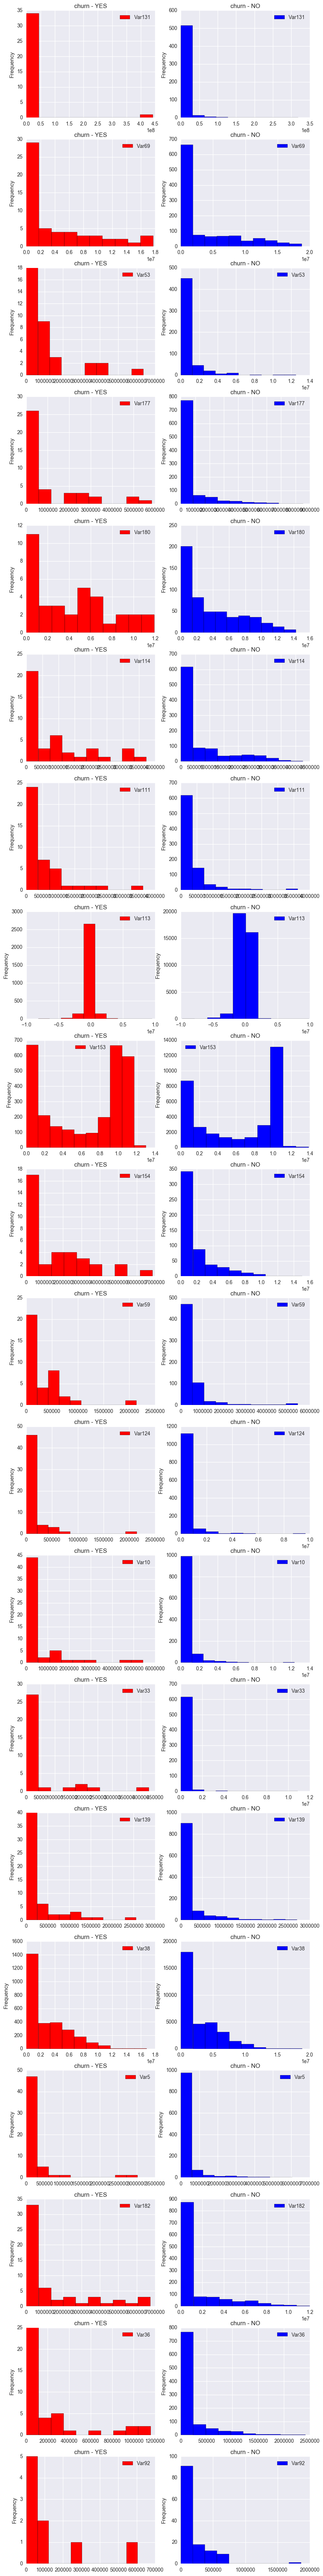

In [20]:
# 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией: 
# распределения в разрезе классов

fig, axes = plt.subplots(nrows=20, ncols=2, figsize=(10, 90))
j=0
for i in range (1,21):

    gra1=for_graph_1[for_graph_1.churn==1][[i]].dropna(axis=0)
    gra2=for_graph_1[for_graph_1.churn==-1][[i]].dropna(axis=0)

    gra1.plot(kind='hist', color='red',  title='churn - YES', ax=axes[j / 2, j % 2])
    gra2.plot(kind='hist', color='blue', title='churn - NO', ax=axes[(j+1) / 2, (j+1) % 2])
    
    j=j+2
    

In [21]:
# 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией: 
# объекты в координатах пар признаков

In [22]:
# Поскольку в данных много пропусков, для построения графиков выберем только те пары признаков,
# у которых на одних и тех же объектах есть непустые значения 
# (номера таких признаков - в списке no_nan_list_1) 
no_nan_list_1=[]
for i in range(1,20):
    for j in range(2,21):
        if i<j & len(for_graph_1[[i,j]].dropna(axis=0))>0:
            no_nan_list_1.append([i,j])
print 'Количество пар признаков для графиков:',len(no_nan_list_1), ', и еще 20 графиков - все признаки с целевым'

Количество пар признаков для графиков: 27 , и еще 20 графиков - все признаки с целевым


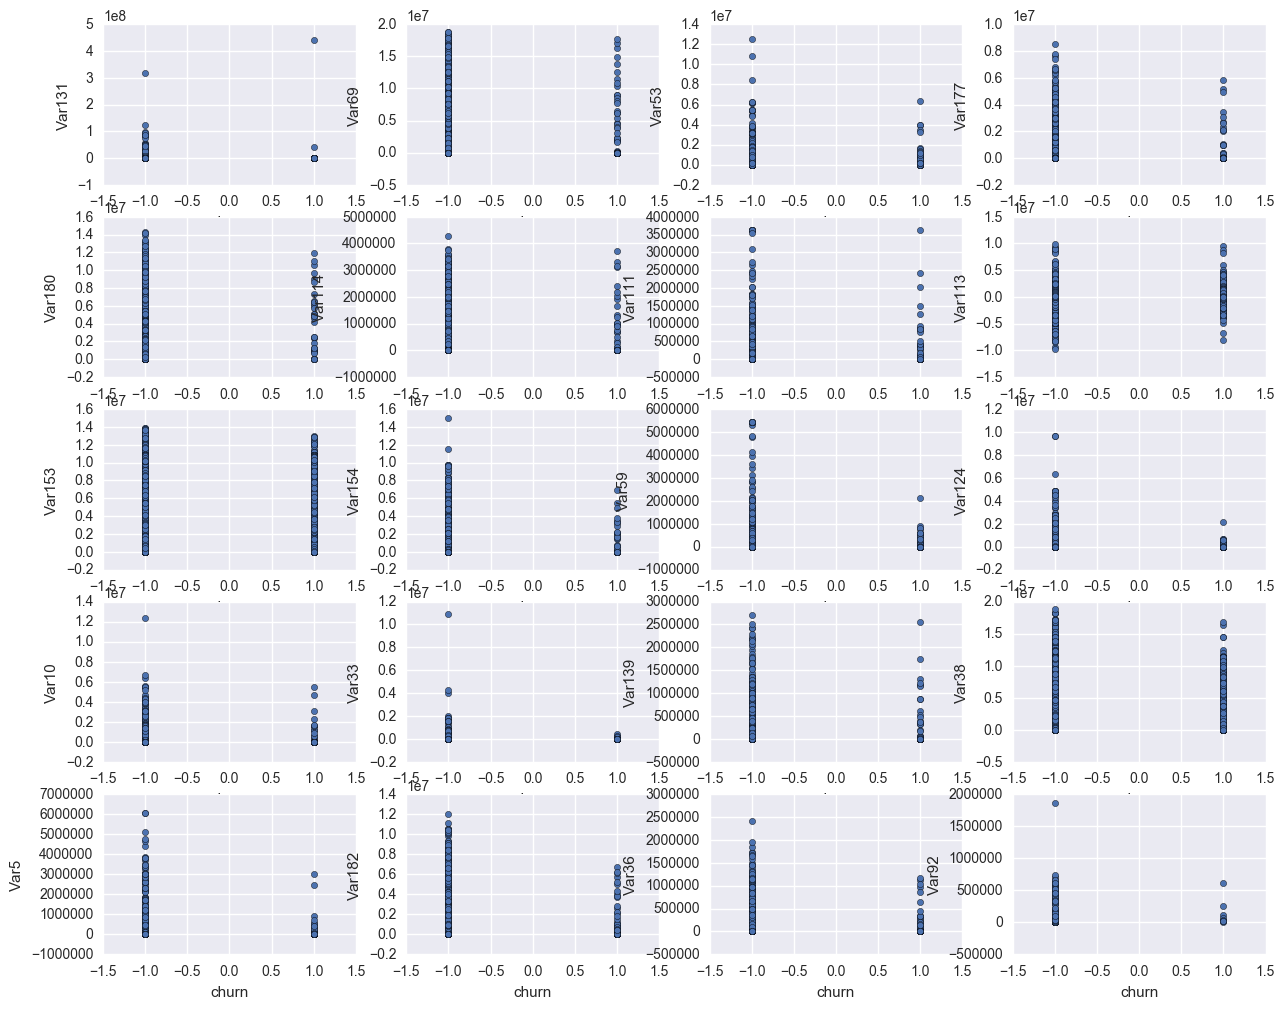

In [23]:
# 20 графиков: каждая из 20 отобранных переменнаых - целевая функция 
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 12))
for idx, feature in enumerate(for_graph_1.columns[-20:]):
    for_graph_1.plot("churn", feature, kind="scatter",  ax=axes[idx / 4, idx % 4])

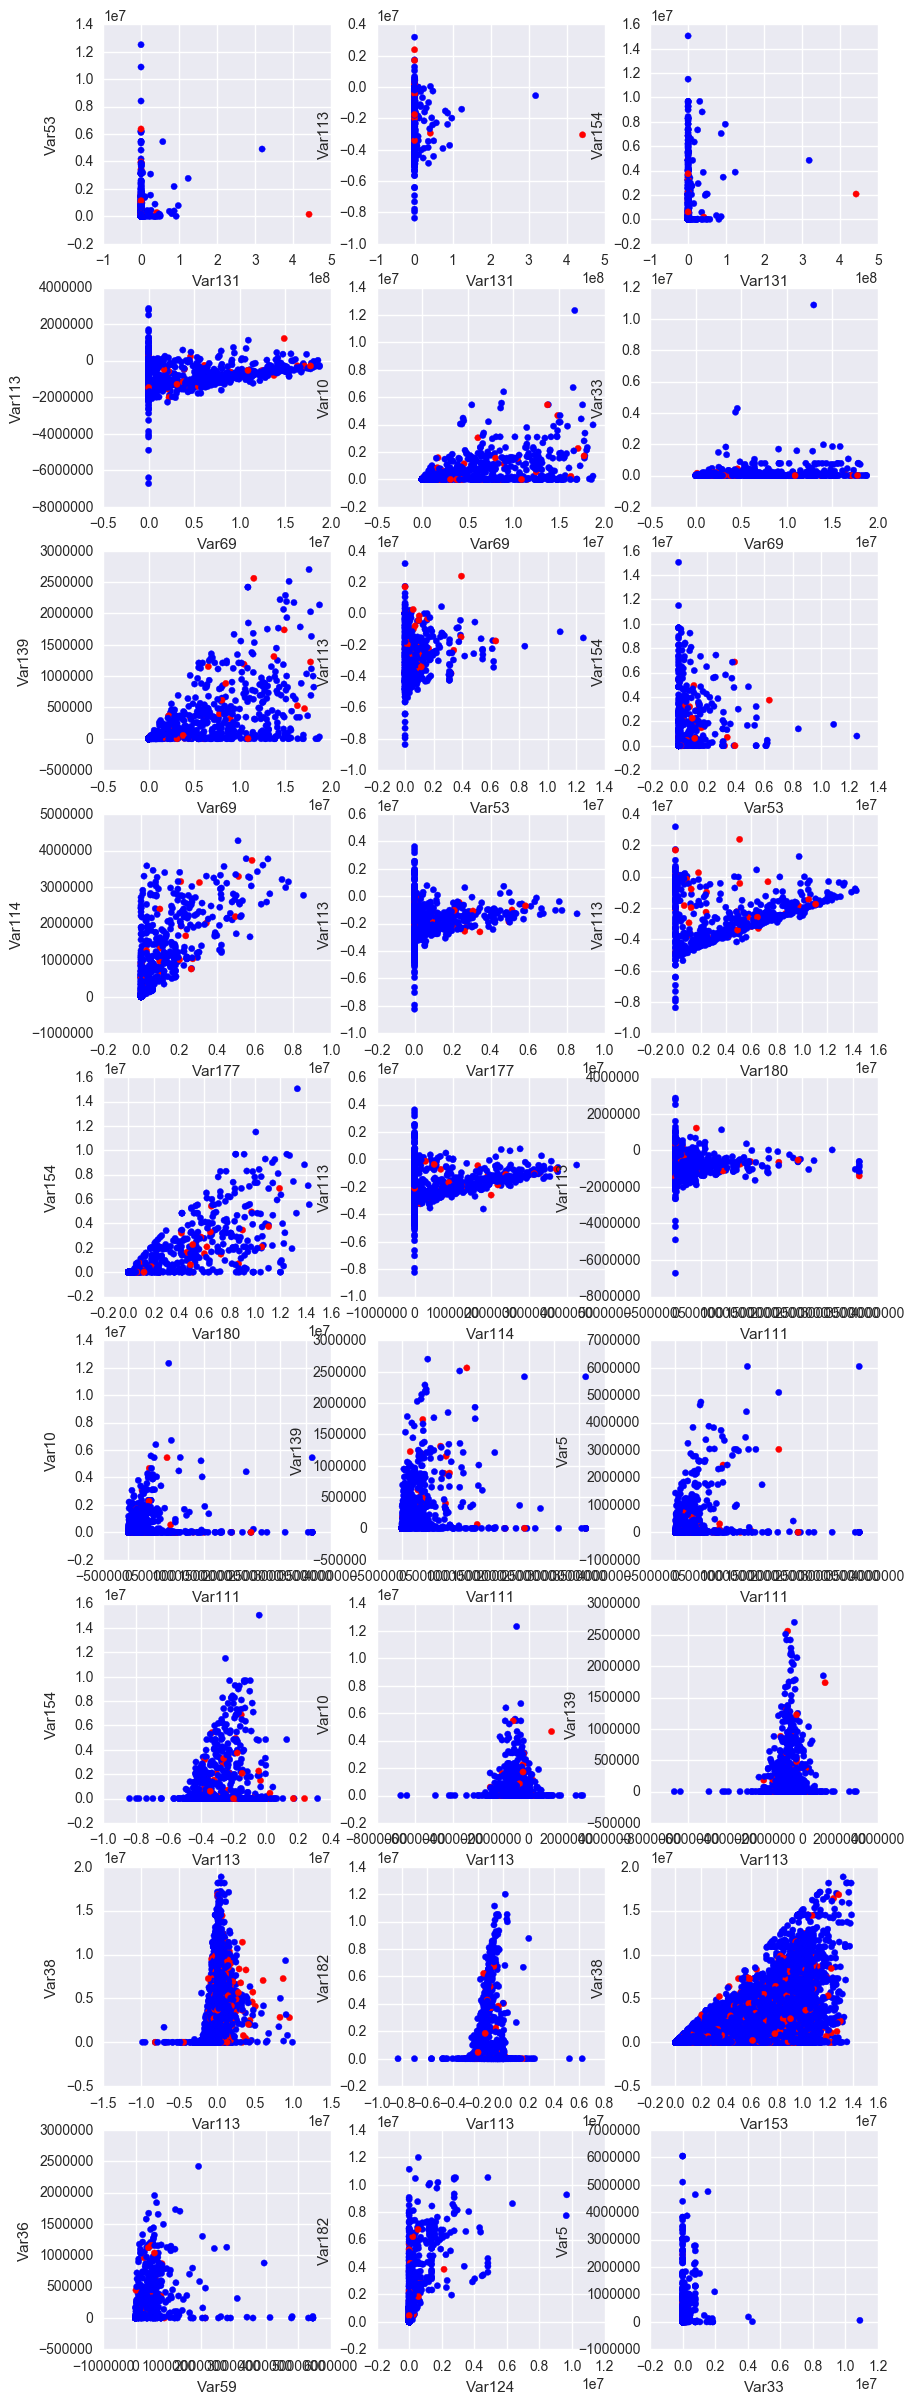

In [24]:
# 27 графиков: объекты в координатах пар признаков 
# (ранее отобранные пары признаков, у которых на одних и тех же объектах есть непустые значения)

plt.figure(figsize=(10,30))
for i in range(len(no_nan_list_1)):
    i1=no_nan_list_1[i][0]
    i2=no_nan_list_1[i][1]
    ax = plt.subplot(9, 3, i+1)
    gra=for_graph_1[[0,i1,i2]].dropna(axis=0)
    c=["red" if gra.churn.iloc[k]==1 else "blue" for k in range(len(gra))]
    plt.scatter(gra[[1]],gra[[2]],color=c)
    plt.xlabel(gra.columns[1])
    plt.ylabel(gra.columns[2])

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [25]:
# 10 случайно выбранных числовых переменных:
# Подготовка DataFrame for_graph_2, содержащего 10 случайно выбранных числовых переменных
# и целевую переменную
nam_graph_2=[]
ind_graph_2=[]

random.seed(2)
for i in range(10):
    i1=random.randint(0, korr_num_df.shape[0])
    wrk=korr_num_df
    if i1 in ind_graph_2:
        i=i-1
    else:
        ind_graph_2.append(wrk.index[i1])
        nam_graph_2.append(wrk.Var[wrk.index[i1]])
    
for_graph_2=pd.DataFrame()
for_graph_2['churn']=orange_labels.churn

for j in range(10):
    for_graph_2[nam_graph_2[j]]=orange_data_ch[nam_graph_2[j]]

In [26]:
for_graph_2.head()

,churn,Var184,Var18,Var84,Var26,Var53,Var87,Var116,Var9,Var178,Var107
0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


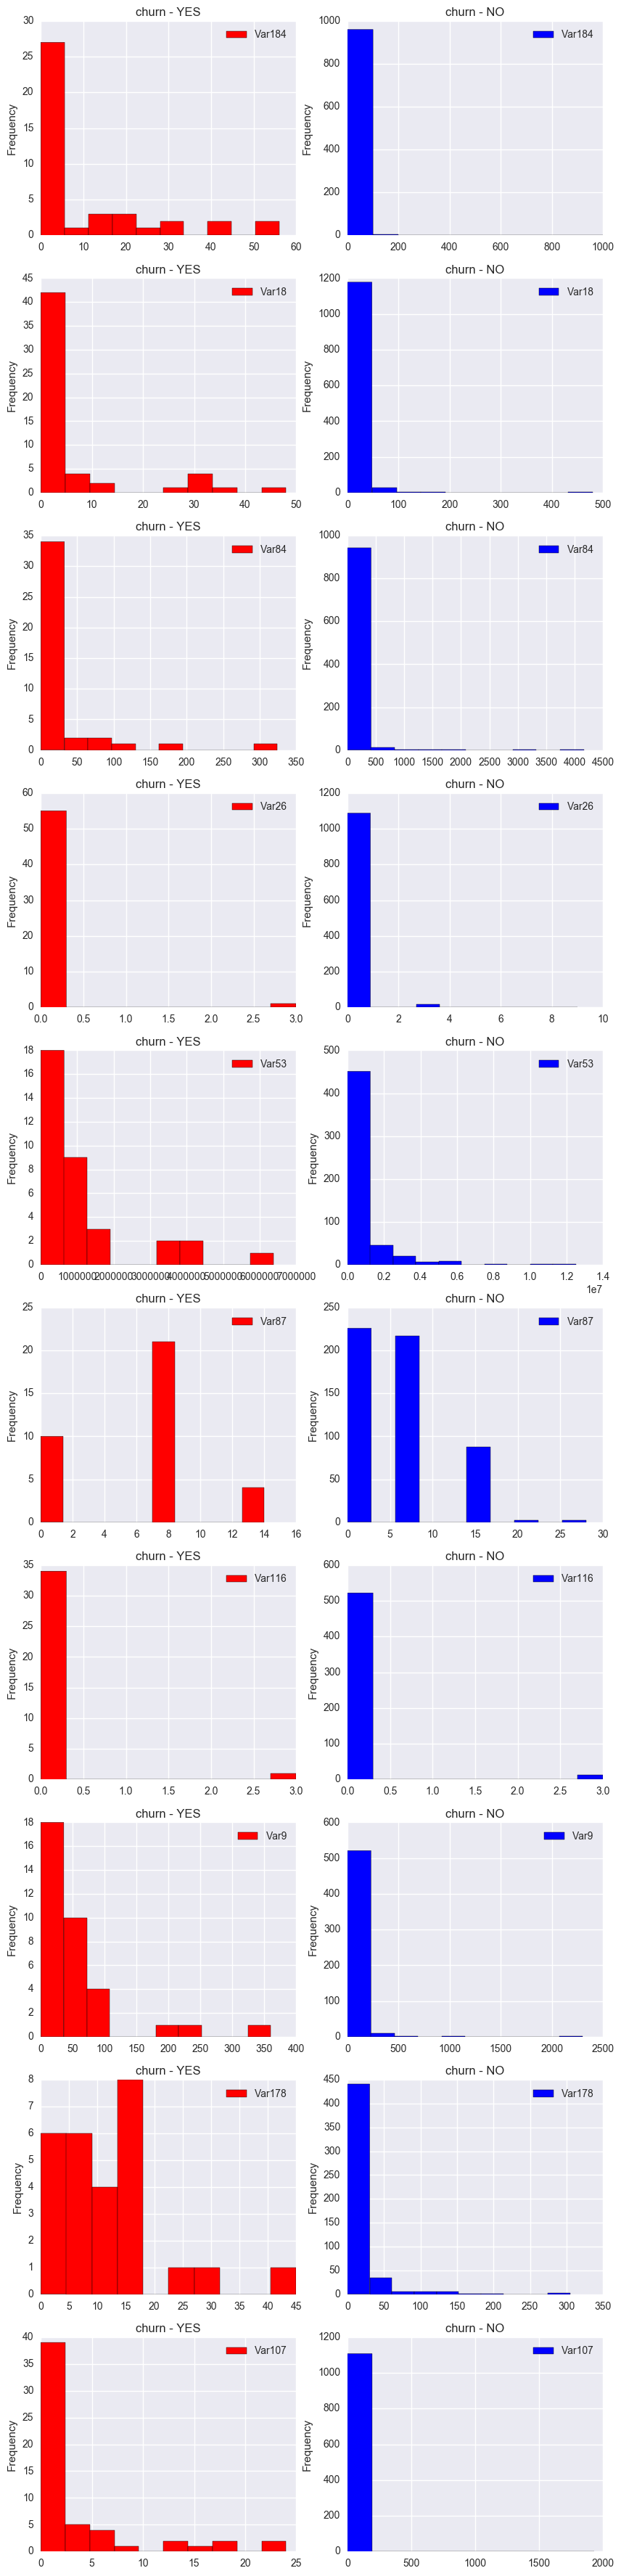

In [27]:
# 10 случайно выбранных числовых переменных: 
# распределения в разрезе классов

fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(10, 45))
j=0
for i in range (1,11):

    gra1=for_graph_2[for_graph_2.churn==1][[i]].dropna(axis=0)
    gra2=for_graph_2[for_graph_2.churn==-1][[i]].dropna(axis=0)

    gra1.plot(kind='hist', color='red',  title='churn - YES', ax=axes[j / 2, j % 2])
    gra2.plot(kind='hist', color='blue', title='churn - NO', ax=axes[(j+1) / 2, (j+1) % 2])
    
    j=j+2

In [28]:
# 10 случайно выбранных числовых переменных: 
# объекты в координатах пар признаков

In [29]:
# Поскольку в данных много пропусков, для построения графиков выберем только те пары признаков,
# у которых на одних и тех же объектах есть непустые значения 
# (номера таких признаков - в списке no_nan_list_2) 
no_nan_list_2=[]
for i in range(1,10):
    for j in range(2,11):
        if i<j & len(for_graph_2[[i,j]].dropna(axis=0))>0:
            no_nan_list_2.append([i,j])
print 'Количество пар признаков для графиков:',len(no_nan_list_2), ', и еще 10 графиков - все признаки с целевым'

Количество пар признаков для графиков: 6 , и еще 10 графиков - все признаки с целевым


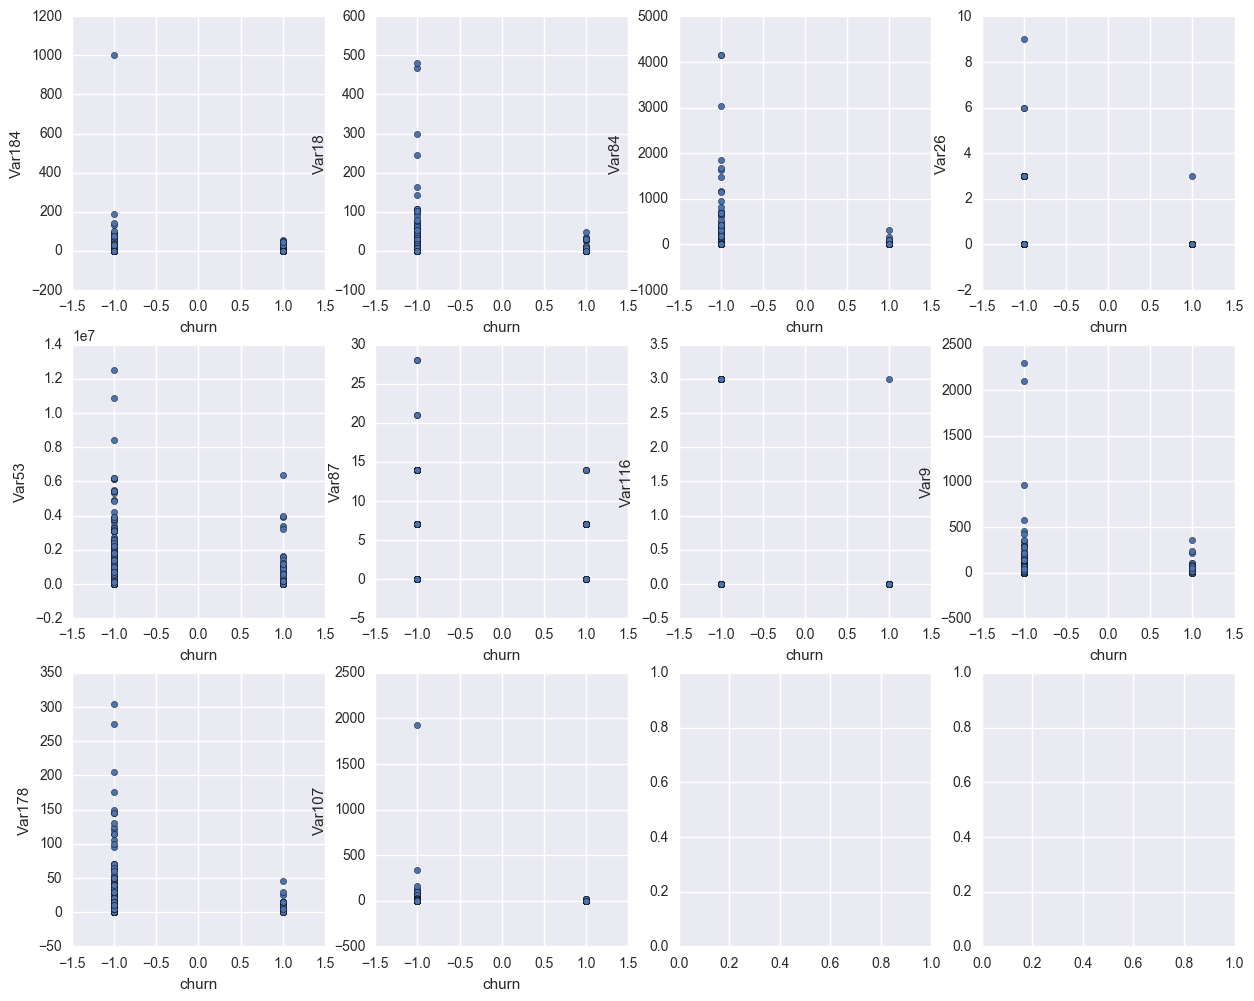

In [30]:
# 10 графиков: каждая из 10 отобранных переменнаых - целевая функция 
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
for idx, feature in enumerate(for_graph_2.columns[-10:]):
    for_graph_2.plot("churn", feature, kind="scatter",  ax=axes[idx / 4, idx % 4])

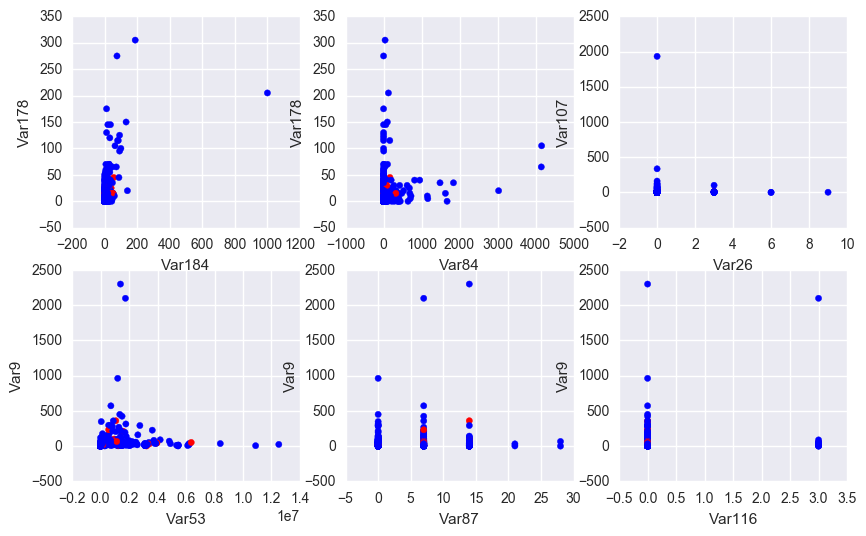

In [31]:
# 6 графиков: объекты в координатах пар признаков 
# (ранее отобранные пары признаков, у которых на одних и тех же объектах есть непустые значения)

plt.figure(figsize=(10,6))
for i in range(len(no_nan_list_2)):
    i1=no_nan_list_2[i][0]
    i2=no_nan_list_2[i][1]
    ax = plt.subplot(2, 3, i+1)
    gra=for_graph_2[[0,i1,i2]].dropna(axis=0)
    c=["red" if gra.churn.iloc[k]==1 else "blue" for k in range(len(gra))]
    plt.scatter(gra[[1]],gra[[2]],color=c)
    plt.xlabel(gra.columns[1])
    plt.ylabel(gra.columns[2])

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [32]:
# 10 числовых переменных, наименее сильно коррелирующих с целевой функцией:
korr_num_df.sort_values(['korr_num'],ascending=True).head(10)

,Var,korr_num,len
106,Var118,0.000000,140
126,Var138,0.001639,1275
36,Var44,0.003251,35984
158,Var173,0.005087,35984
1,Var2,0.005181,1006
104,Var116,0.012817,570
3,Var4,0.016095,1275
22,Var26,0.016762,1165
25,Var29,0.018692,570
165,Var181,0.020968,35984


In [33]:
# Подготовка DataFrame for_graph_3, содержащего 10 числовых переменных, 
# наименее сильно коррелирующих с целевой переменной, и целевую переменную
nam_graph_3=[]
ind_graph_3=[]

for i in range(10):
    wrk=korr_num_df.sort_values(['korr_num'],ascending=True)
    ind_graph_3.append(wrk.index[i])
    nam_graph_3.append(wrk.Var[wrk.index[i]])

for_graph_3=pd.DataFrame()
for_graph_3['churn']=orange_labels.churn

for j in range(10):
    for_graph_3[nam_graph_3[j]]=orange_data_ch[nam_graph_3[j]]

In [34]:
for_graph_3.head()

,churn,Var118,Var138,Var44,Var173,Var2,Var116,Var4,Var26,Var29,Var181
0,-1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
1,-1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2,-1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
3,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
4,-1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0


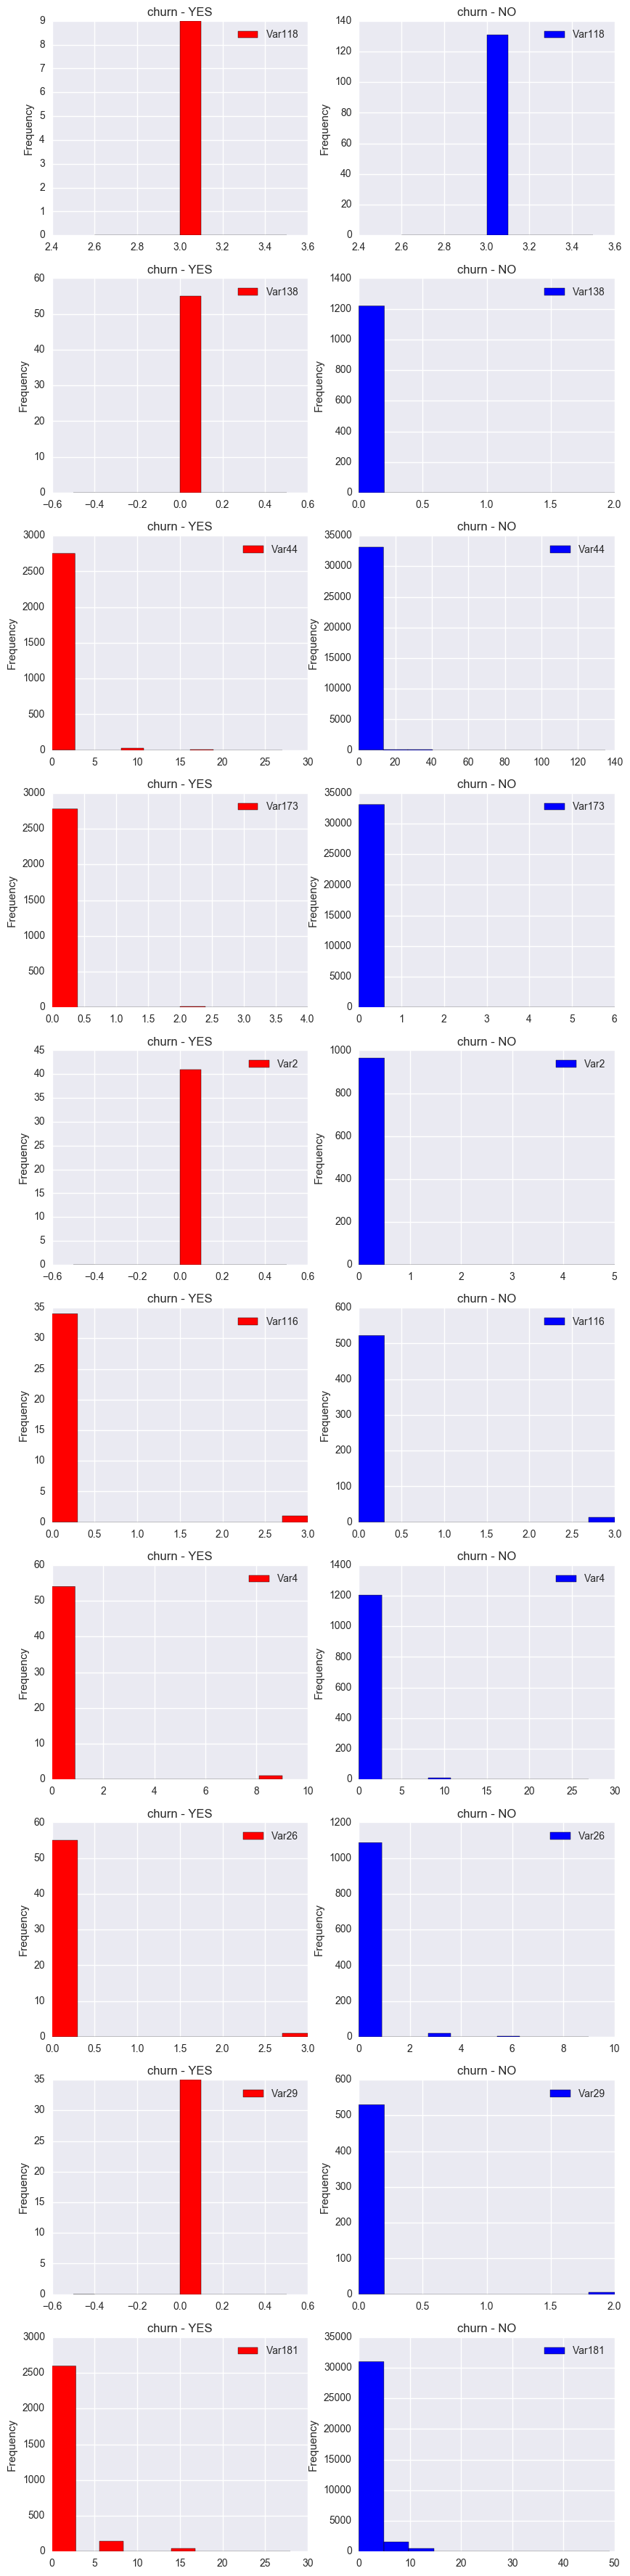

In [35]:
# 10 числовых признаков, наименее сильно коррелирующих с целевой переменной: 
# распределения в разрезе классов

fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(10, 45))
j=0
for i in range (1,11):

    gra1=for_graph_3[for_graph_3.churn==1][[i]].dropna(axis=0)
    gra2=for_graph_3[for_graph_3.churn==-1][[i]].dropna(axis=0)

    gra1.plot(kind='hist', color='red',  title='churn - YES', ax=axes[j / 2, j % 2])
    gra2.plot(kind='hist', color='blue', title='churn - NO', ax=axes[(j+1) / 2, (j+1) % 2])
    
    j=j+2

In [36]:
# 10 случайно выбранных числовых переменных: 
# объекты в координатах пар признаков

In [37]:
# Поскольку в данных много пропусков, для построения графиков выберем только те пары признаков,
# у которых на одних и тех же объектах есть непустые значения 
# (номера таких признаков - в списке no_nan_list_3) 
no_nan_list_3=[]
for i in range(1,10):
    for j in range(2,11):
        if i<j & len(for_graph_3[[i,j]].dropna(axis=0))>0:
            no_nan_list_3.append([i,j])
print 'Количество пар признаков для графиков:',len(no_nan_list_3), ', и еще 10 графиков - все признаки с целевым'

Количество пар признаков для графиков: 3 , и еще 10 графиков - все признаки с целевым


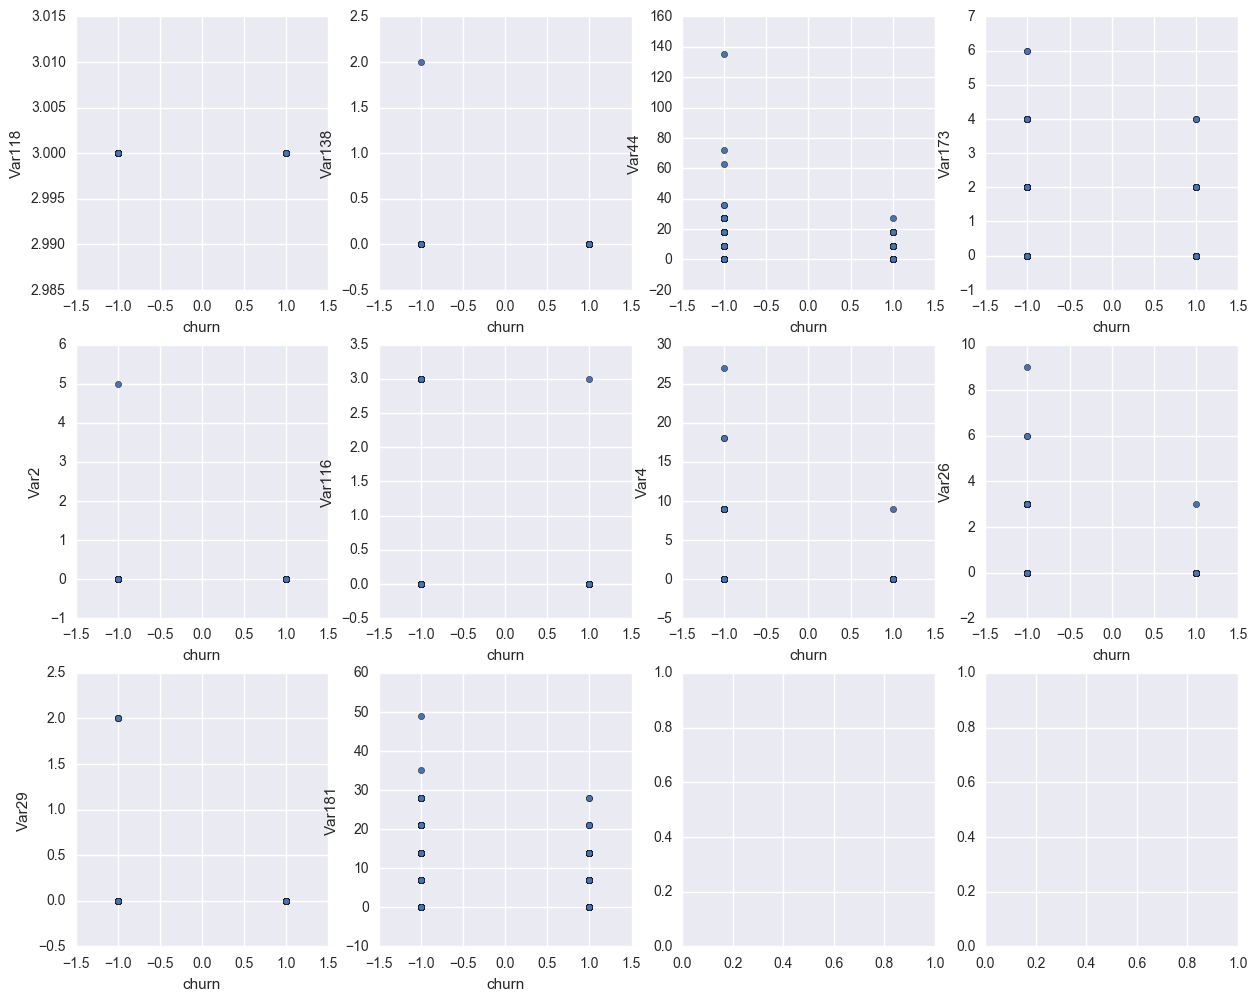

In [38]:
# 10 графиков: каждая из 10 отобранных переменнаых - целевая функция 
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
for idx, feature in enumerate(for_graph_3.columns[-10:]):
    for_graph_3.plot("churn", feature, kind="scatter",  ax=axes[idx / 4, idx % 4])

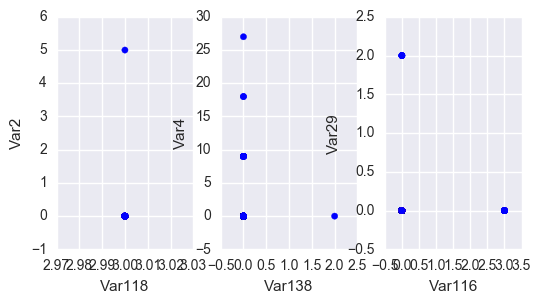

In [39]:
# 3 графика: объекты в координатах пар признаков 
# (ранее отобранные пары признаков, у которых на одних и тех же объектах есть непустые значения)

plt.figure(figsize=(6,3))
for i in range(len(no_nan_list_3)):
    i1=no_nan_list_3[i][0]
    i2=no_nan_list_3[i][1]
    ax = plt.subplot(1, 3, i+1)
    gra=for_graph_3[[0,i1,i2]].dropna(axis=0)
    c=["red" if gra.churn.iloc[k]==1 else "blue" for k in range(len(gra))]
    plt.scatter(gra[[1]],gra[[2]],color=c)
    plt.xlabel(gra.columns[1])
    plt.ylabel(gra.columns[2])

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [40]:
# Полный список категориальных переменных (у которых есть хотя бы одно непустое значение), 
# с уазаниеи абсолютого значения коэффициента V Кремера 
# для каждой категориальной переменной с целевой переменной, 
# а также количетва значений, которые принимает каждая категориальная переменная 
korr_cat_df.sort_values(['val_numb'])

,Var,korr_num,val_numb
0,Var191,0.013905,2
32,Var224,0.008776,2
23,Var215,0.005165,2
21,Var213,0.015964,2
19,Var211,0.031932,2
26,Var218,0.101756,3
10,Var201,0.018134,3
17,Var208,0.011882,3
33,Var225,0.056515,4
3,Var194,0.019348,4


In [41]:
# Как уже отмечалось выше, абсолютые значения коэффициента V Кремера 
# для каждой категориальной переменной с целевой переменной
# выше для тех категориальных переменных, которые принимают слишом много значений для визуализации,
# поэтому вначале построим гистограммы значений категориальных переменных, 
# которые принимают не более 10 значений, для разных классов

In [42]:
# Подготовка DataFrame for_graph_4, содержащего категориальные переменные, 
# которые принимают не более 10 значений
nam_graph_4=[]
ind_graph_4=[]
wrk=korr_cat_df.sort_values(['val_numb'])
l=wrk.val_numb[wrk.index[0]]
i=0
while l<=10:
    ind_graph_4.append(wrk.index[i])
    nam_graph_4.append(wrk.Var[wrk.index[i]])
    i=i+1
    l=wrk.val_numb[wrk.index[i]]
    
for_graph_4=pd.DataFrame()
for_graph_4['churn']=orange_labels.churn

for j in range(i):
    for_graph_4[nam_graph_4[j]]=orange_data_ch[nam_graph_4[j]]
    
print 'выбрано категориальных принаков:', for_graph_4.shape[1]-1

выбрано категориальных принаков: 18


In [43]:
for_graph_4.head()

,churn,Var191,Var224,Var215,Var213,Var211,Var218,Var201,Var208,Var225,Var194,Var196,Var205,Var223,Var229,Var203,Var210,Var227,Var221
0,-1,NaN,NaN,NaN,NaN,L84s,cJvF,NaN,kIsH,NaN,NaN,1K8T,09_Q,LM8l689qOp,NaN,9_Y1,uKAI,02N6s8f,Al6ZaUT
1,-1,NaN,NaN,NaN,NaN,L84s,cJvF,NaN,kIsH,ELof,NaN,1K8T,VpdQ,LM8l689qOp,mj86,9_Y1,uKAI,RAYp,oslk
2,-1,NaN,NaN,NaN,NaN,L84s,UYBR,NaN,kIsH,NaN,NaN,1K8T,VpdQ,LM8l689qOp,mj86,9_Y1,uKAI,ZI9m,zCkv
3,1,NaN,NaN,NaN,NaN,L84s,cJvF,NaN,kIsH,NaN,NaN,1K8T,VpdQ,LM8l689qOp,NaN,F3hy,uKAI,RAYp,oslk
4,-1,NaN,NaN,NaN,NaN,L84s,cJvF,NaN,kIsH,NaN,NaN,1K8T,sJzTlal,LM8l689qOp,NaN,9_Y1,uKAI,RAYp,oslk


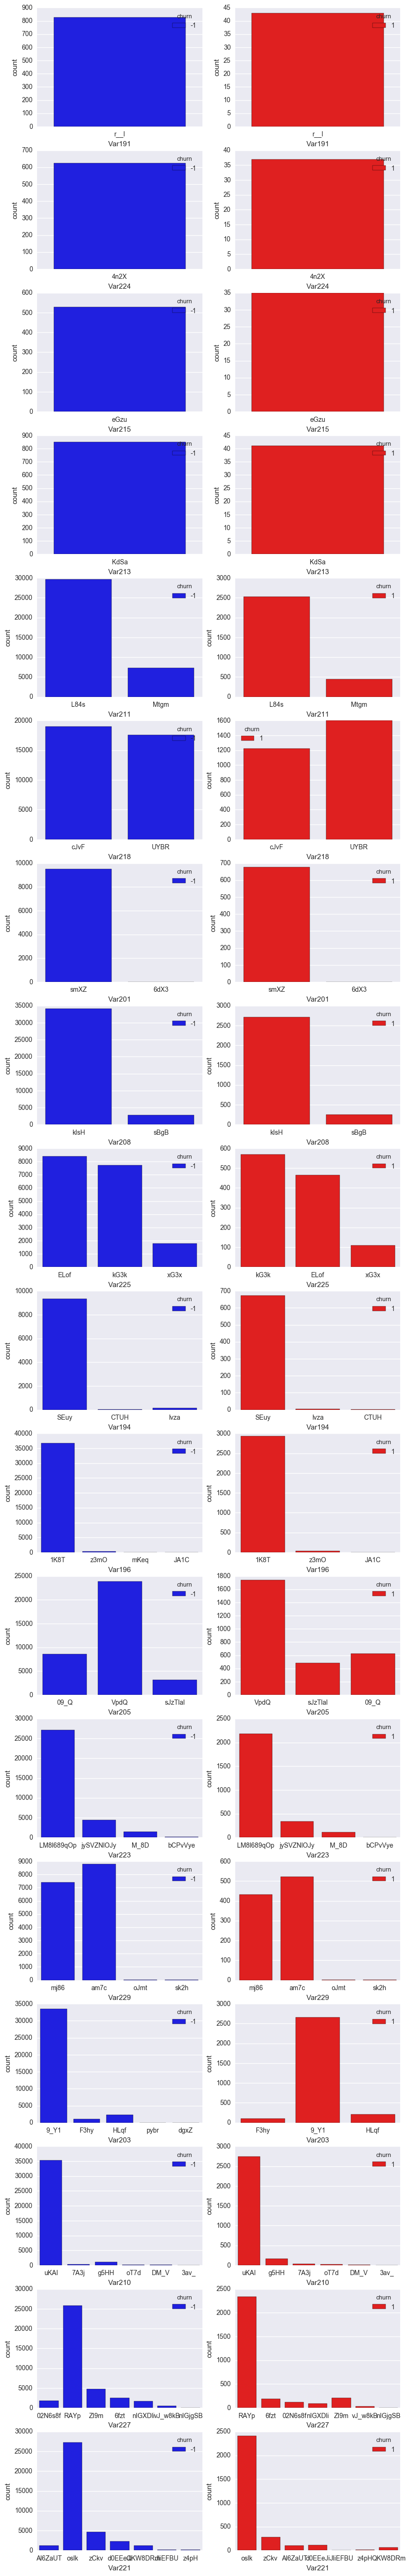

In [44]:
# 18 категориальных переменных, которые принимают не более 10 значений.
# Гистограммы значений категориальных переменных для разных классов

fig, axes = plt.subplots(nrows=18, ncols=2, figsize=(10, 70))
j=0
for i in range (1,19):

    name_var=for_graph_4.columns[i]

    seaborn.countplot(x=name_var, hue="churn", data=for_graph_4[for_graph_4.churn==-1], palette=['b'],ax=axes[j / 2, j % 2])
    seaborn.countplot(x=name_var, hue="churn", data=for_graph_4[for_graph_4.churn==1], palette=['r'],ax=axes[(j+1) / 2, (j+1) % 2])

    j=j+2

In [45]:
# Отдельно построим гистограммы распределения значений 20-ти категориальнх переменных
# преобразованных в бинарную переменную "есть / нет" в разных классах (отток / не отток),
# с самым высоким абсолютным значением коэффициента Мэтьюса.

In [46]:
# Подготовка DataFrame for_graph_5, содержащего отобранные значения категориальные переменные
nam_graph_5=[]
param_5=[]
ind_graph_5=[]
wrk=mcc_cat_df.sort_values(['mcc'],ascending=False)

for i in range(20):
    ind_graph_5.append(wrk.index[i])  
    nam_graph_5.append(wrk.Var[wrk.index[i]])
    param_5.append(wrk.Var_r[wrk.index[i]])
    
for_graph_5=pd.DataFrame()
for_graph_5['churn']=orange_labels.churn

lst_tst=[]
for j in range(20):
    if nam_graph_5[j] in lst_tst: 
        for_graph_5[nam_graph_5[j]+'-d']=orange_data_ch[nam_graph_5[j]]  
    else:
        for_graph_5[nam_graph_5[j]]=orange_data_ch[nam_graph_5[j]]
    lst_tst.append(nam_graph_5[j])

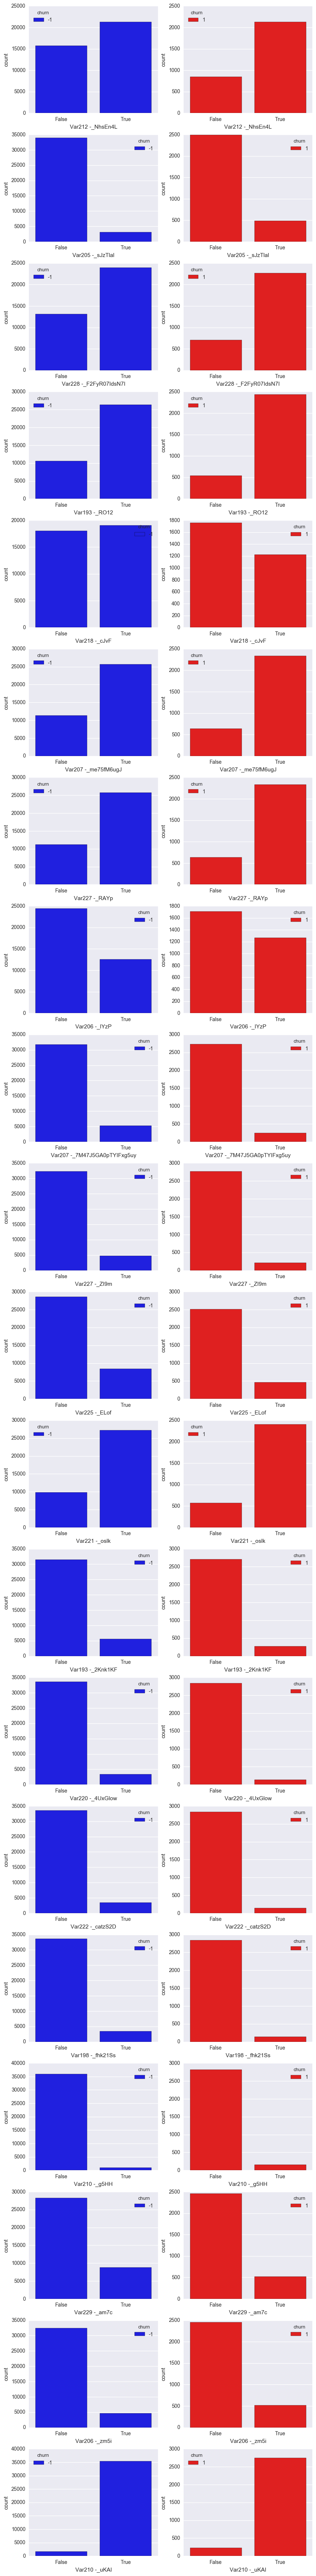

In [47]:
# 20 отобранных значений категориальных переменных.
# Гистограммы наличия / осутствия значений для разных классов

fig, axes = plt.subplots(nrows=20, ncols=2, figsize=(10, 90))
j=0
for i in range (1,21):
    name_var=nam_graph_5[i-1]+' -_'+param_5[i-1]
    gra1=pd.DataFrame()
    gra1['churn']=for_graph_5['churn']
    gra1[name_var]=for_graph_5[[i]]==param_5[i-1]
    seaborn.countplot(x=name_var, hue="churn", data=gra1[gra1.churn==-1], palette=['b'],ax=axes[j / 2, j % 2])
    seaborn.countplot(x=name_var, hue="churn", data=gra1[gra1.churn==1], palette=['r'],ax=axes[(j+1) / 2, (j+1) % 2])

    j=j+2

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

Особенность числовых данных - большое количество пропусков и, в некоторых случаях, большой разброс значений прзнаков. Также практичеки все числовые данные, которые были визуализированы, чаще всего принимают нулевое значение.

В группе "отток есть" для большинства визуализирванных переменных количество непустых значений очень мало.

Поэтому я, в первую очередь, ипользовала бы признаки Var113, Var153, Var38 - в группе "отток есть" непустых значений этих признаков достаточно много. Кроме того, можно предположить, что у первых двух из перечисленных признаков есть "пиковые" значения помимо 0.0, причем характерные только одной из двух целевых групп.

Для расширения списка признаов можно рассмотреть группу признаков более, чем из 20 первых в списке самых коррелирующих с целевым признком. И, кроме первых 20-ти, проверила бы наличие признаков, характеистики которых подобны характеристикам Var113, Var153, Var38.

Из категориальных я бы использовала выделенные  значения категориальнх переменных преобразованных в бинарную переменную "есть / нет" в разных классах (отток / не отток), с самым высоким абсолютным значением коэффициента Мэтьюса.

Предполагаю, что шумовыми, первую очередь, являютя часотвые признаки, попавшие в группу "10 числовых признаков, наименее сильно коррелирующих с целевой переменной".

Учитывая все перечисленное выше, имеет смысл произести отбор признаков для построения модели.
